<a href="https://colab.research.google.com/github/Rajesh16702/AGENT/blob/master/DL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning Assignment - 1 set 3

##Question No.1. Vision Dataset: Please find your dataset from the link - https://www.kaggle.com/chetankv/dogs-cats-images (6 marks)

Common libraries to import

In [112]:
import os
import zipfile
import random
import json
import csv
import shutil
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from shutil import copyfile
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import models
from keras import layers
from keras import regularizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

In [113]:
random.seed(111)         # Initialize the random number generator.
np.random.seed(111)      # With the seed reset, the same set of numbers will appear every time. 
#tf.set_random_seed(42)  # sets the graph-level random seed
tf.random.set_seed(111)

#To read Kaggle Dataset directly, we need to have kaggle library installed and API keys json uploaded

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Click on ‘Choose Files’ to upload the kaggle.json file

In [ ]:
from google.colab import files
files.upload()

 Move the kaggle.json file into the folder where the API expects to find it

In [4]:
!mkdir -p ~/.kaggle                                               
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

To search for specific datasets, add the -s tag and then the keyword you’re interested in.

In [5]:
!kaggle datasets list -s dogs

ref                                                        title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jessicali9530/stanford-dogs-dataset                        Stanford Dogs Dataset                               750MB  2019-11-13 06:20:35          25665        833  0.75             
shaunthesheep/microsoft-catsvsdogs-dataset                 Cats-vs-Dogs                                        788MB  2020-03-12 05:34:30          11557        185  0.875            
chetankv/dogs-cats-images                                  Dogs & Cats Images                                  435MB  2018-04-19 18:20:08          28381        532  0.5625           
d4rklucif3r/cat-and-dogs                                   Cat & Dogs                

Copied the "Copy API command" from Dataset tab of Kaggle page to access the dataset

In [6]:
!kaggle datasets download -d chetankv/dogs-cats-images

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)


#Unzip the images for cat and dogs
##dog vs cat/dataset/training_set/cats/ & dog vs cat/dataset/test_set/cats/  for cats  
##dog vs cat/dataset/training_set/dogs/ & dog vs cat/dataset/test_set/dogs/ for dogs


In [7]:
!unzip dogs-cats-images

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

##Validate the image files unzipped from kaggle datasource

In [114]:
# training data
train_source_path = 'dog vs cat/dataset/training_set'
train_source_path_dogs = os.path.join(train_source_path, 'dogs')
train_source_path_cats = os.path.join(train_source_path, 'cats')

# os.listdir returns a list containing all files under the given path
print("Training Dataset counts")
print(f"There are {len(os.listdir(train_source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(train_source_path_cats))} images of cats.")

Training Dataset counts
There are 4000 images of dogs.
There are 4000 images of cats.


In [115]:
# testing data
test_source_path = 'dog vs cat/dataset/test_set'
test_source_path_dogs = os.path.join(test_source_path, 'dogs')
test_source_path_cats = os.path.join(test_source_path, 'cats')

# os.listdir returns a list containing all files under the given path
print("Test Dataset counts")
print(f"There are {len(os.listdir(test_source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(test_source_path_cats))} images of cats.")

Test Dataset counts
There are 1000 images of dogs.
There are 1000 images of cats.


#1. Data Visualization and augmentation (1 mark)
1. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).
2. Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented
image and the original image for each class and each augmentation.
3. Bring the train and test data in the required format.
4. Print the shapes of train and test data.

We will consider few images (2 from train and 2 from test) and will print it along with data augmentation (rotation_range, height_shift_range) using ImageDataGenerator function from keras.

Cat image with rotation_range 30, height_shift_range = 0.3

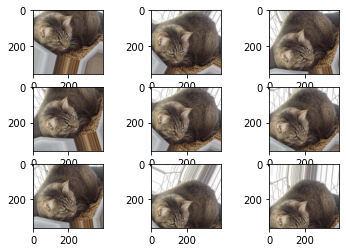

In [31]:
# load the image of cats
cat1 = load_img('dog vs cat/dataset/training_set/cats/cat.375.jpg')
# convert to numpy array
data = img_to_array(cat1)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=30, height_shift_range=0.3)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()


Cat image with rotation_range 45, height_shift_range = 0.2

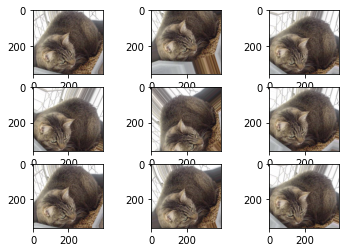

In [11]:
# load the image of cats
cat2 = load_img('dog vs cat/dataset/test_set/cats/cat.4001.jpg')
# convert to numpy array
data = img_to_array(cat1)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=45, height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

Dog image with rotation_range 60, height_shift_range = 0.1

In [108]:
dog1 = load_img('dog vs cat/dataset/training_set/dogs/dog.149.jpg')
# convert to numpy array
data = img_to_array(dog1)
# expand dimension to one sample
samples = expand_dims(data, 0)

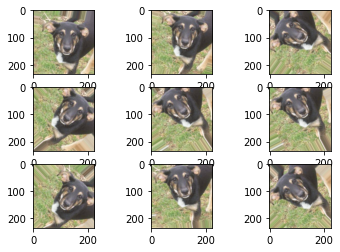

In [12]:
# load the image of dogs
dog1 = load_img('dog vs cat/dataset/training_set/dogs/dog.149.jpg')
# convert to numpy array
data = img_to_array(dog1)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=60, height_shift_range=0.1)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

Dog image with rotation_range 90, height_shift_range = 0.5

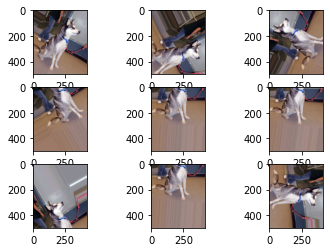

In [13]:
# load the image of cats
dog2 = load_img('dog vs cat/dataset/test_set/dogs/dog.4001.jpg')
# convert to numpy array
data = img_to_array(dog2)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90, height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

Create dataset for training, validation and testing

In [116]:
train_dogs =   [train_source_path_dogs+'/'+i for i in os.listdir(train_source_path_dogs) if 'dog' in i]
train_cats =   [train_source_path_cats+'/' +i for i in os.listdir(train_source_path_cats) if 'cat' in i]
random.shuffle(train_dogs)
random.shuffle(train_cats)
train_images = train_dogs[:3000] + train_cats[:3000]
validation_images = train_dogs[3000:] + train_cats[3000:]

test_images =  [test_source_path+'/'+i for i in os.listdir(test_source_path)]

In [117]:
def prep_data(images):
    count = len(images)
    X = np.ndarray((count, 150, 150, 3), dtype=np.float32)
    y = np.zeros((count,), dtype=np.float32)
    
    for i, image_file in enumerate(images):
        img = load_img(image_file, target_size=(150, 150))
        X[i] = img_to_array(img)
        if 'dog' in image_file:
            y[i] = 1.
        if i%1000 == 0: print('Processed {} of {}'.format(i, count))
    
    return X, y

In [ ]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [118]:
X_train, y_train = prep_data(train_images)

Processed 0 of 6000
Processed 1000 of 6000
Processed 2000 of 6000
Processed 3000 of 6000
Processed 4000 of 6000
Processed 5000 of 6000


In [119]:
X_validation, y_validation = prep_data(validation_images)

Processed 0 of 2000
Processed 1000 of 2000


In [126]:
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(6000, 150, 150, 3)
(6000, 2)
(2000, 150, 150, 3)
(2000, 2)


In [121]:
y_train = tf.keras.utils.to_categorical(y_train)
y_validation = tf.keras.utils.to_categorical(y_validation)

We will code the generators that will yield batches of images, both for training and validation using the train_val_generators function

In [122]:
batch_size = 128
epochs = 50

In [123]:
# Generators
# training dataset 
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.3,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randomly flips the image
      shear_range = .2,              # shear the image by 20%. 
      zoom_range = .2,               # zoom the image by 20%
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

  # Specify criteria about our training data, such as the directory, image size, batch size and type automatically retrieve images 
  # and their classes for train and validation sets
train_generator = train_datagen.flow(
      X_train,
      y_train,
      batch_size=batch_size,
      shuffle = True)

# validation dataset
validation_datagen = ImageDataGenerator(rescale = 1.0 / 255)

  # Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow(
      X_validation,
      y_validation,
      batch_size=batch_size)

Model building

In [124]:
# Create a model object
model = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [105]:
# Layer 1 = input layer
# specify the input size for in the first layer.

model.add(layers.Dense(50, activation='relu', input_shape= input_shape))

# Layer 2 = hidden layer  with Regularizers
model.add(layers.Dense(60, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)) )

# Layer 3 = hidden layer 
model.add(layers.Dense(30, activation='tanh', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)))

#flatten 
model.add(Flatten())
# dropout
model.add(layers.Dropout(0.5))

# Layer 4 = hidden layer 
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)))
#flatten 
#model.add(Flatten())
# dropout
#model.add(layers.Dropout(0.5))
# Layer 5 = hidden layer
model.add(layers.Dense(512, activation='relu'))
# Layer 6 = output layer
model.add(layers.Dense(1, activation='sigmoid'))

#Model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 150, 150, 50)      200       
                                                                 
 dense_51 (Dense)            (None, 150, 150, 60)      3060      
                                                                 
 dense_52 (Dense)            (None, 150, 150, 30)      1830      
                                                                 
 flatten_3 (Flatten)         (None, 675000)            0         
                                                                 
 dropout_10 (Dropout)        (None, 675000)            0         
                                                                 
 dense_53 (Dense)            (None, 10)                6750010   
                                                                 
 dense_54 (Dense)            (None, 512)              

In [74]:
#model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [106]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 1e-4),
                loss = 'binary_crossentropy',
                metrics = ['accuracy']) 

Training the model

In [107]:
# Train the model
train_steps = len(train_images)/batch_size
validation_steps = len(validation_images)/batch_size
# Note that this may take some time.
history = model.fit_generator(train_generator,
                    steps_per_epoch=train_steps,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    verbose =2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
46/46 - 36s - loss: 60.9107 - accuracy: 0.5000 - val_loss: 42.8206 - val_accuracy: 0.5000 - 36s/epoch - 770ms/step
Epoch 2/50
46/46 - 34s - loss: 33.6489 - accuracy: 0.5000 - val_loss: 24.2155 - val_accuracy: 0.5000 - 34s/epoch - 719ms/step
Epoch 3/50
46/46 - 35s - loss: 18.8942 - accuracy: 0.5000 - val_loss: 13.6675 - val_accuracy: 0.5000 - 35s/epoch - 745ms/step
Epoch 4/50
46/46 - 34s - loss: 10.5388 - accuracy: 0.5000 - val_loss: 7.4284 - val_accuracy: 0.5000 - 34s/epoch - 722ms/step
Epoch 5/50
46/46 - 34s - loss: 5.5991 - accuracy: 0.5000 - val_loss: 3.8398 - val_accuracy: 0.5000 - 34s/epoch - 723ms/step
Epoch 6/50
46/46 - 34s - loss: 2.8978 - accuracy: 0.5000 - val_loss: 2.0874 - val_accuracy: 0.5000 - 34s/epoch - 724ms/step
Epoch 7/50
46/46 - 34s - loss: 1.7465 - accuracy: 0.5000 - val_loss: 1.5025 - val_accuracy: 0.5000 - 34s/epoch - 721ms/step
Epoch 8/50
46/46 - 34s - loss: 1.4315 - accuracy: 0.5000 - val_loss: 1.3845 - val_accuracy: 0.5000 - 34s/epoch - 717ms/step
E

In [ ]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['validation_accuracy']
loss=history.history['loss']
validation_loss=history.history['validation_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, validation_loss, 'b', "Validation Loss")
plt.show()

You will probably encounter that the model is overfitting, which means that it is doing a great job at classifying the images in the training set but struggles with new data.

In [ ]:
model.save('dogs-v-cat-data-augmentation-04.h5')

contains the information of the training history of your model

In [ ]:
with open('dogs-v-cat-data-augmentation-04-history.json', 'w') as f:
    json.dump(history.history, f)

In [ ]:
evaluation_images = train_dogs[3000:3500] + train_cats[3000:3500]
random.shuffle(evaluation_images)

X_evaluation, y_evaluation = prep_data(evaluation_images)
X_evaluation /= 255

In [ ]:
evaluation = model.evaluate(X_evaluation, y_evaluation)
evaluation

In [ ]:
X_test, _ = prep_data(test_images)
X_test /= 255.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))

    plt.imshow(image.array_to_img(X_test[i]))
    plt.show()

In [ ]:
with open('dogs-v-cat-data-augmentation-04-results.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                        quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['id', 'label'])
    for i, path in enumerate(test_images):
        basename = os.path.basename(path)
        name = os.path.splitext(basename)[0]
        writer.writerow([name, predictions[i, 0]])

References - 
1. https://github.com/yogarsdna/Coursera-Assignment-Cats-vs-Dogs-with-Data-Augmentation/blob/main/C2W2_Assignment.ipynb

2. https://github.com/sandeep808/Data-Augmentation-Cats-vs-Dogs/blob/master/Data%20Augmentation%20-%20Cats%20vs%20Dogs.ipynb

3. https://www.kaggle.com/code/keogh24/dogs-vs-cats-keras-data-augmentation/notebook

